In [2]:
'''
This Jupyter Notebook contains the utility function, load_plot, and a series of pyplot snippets,
which generate all of the figures used in the Project Mittens paper.

Author:       James Parkington
Created Date: 2023-03-31
'''

import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn

from scipy.optimize import curve_fit

def load_plot(figsize = (10, 6)):
    '''
    Applies a custom dark style and common customizations to a pyplot visualization
    and returns the pyplot, Axes, and color palette objects.

    Args:
        figsize (tuple, optional): The width and height of the figure in inches. Defaults to (10, 6).

    Returns:
        matplotlib.pyplot:     The pyplot object.
        matplotlib.axes.Axes:  The customized axes object.
        seaborn.color_palette: The color palette.
    '''

    plt.style.use(['seaborn-v0_8-darkgrid'])
    plt.rcParams.update({"xtick.labelsize"       : 8,
                         "ytick.labelsize"       : 8,
                         "grid.linestyle"        : ":",
                         "font.family"           : "DejaVu Sans Mono", 
                         "axes.titleweight"      : "bold",
                         "axes.labelweight"      : "bold",
                         "figure.figsize"        : figsize,
                         "legend.loc"            : "upper right",
                         "legend.fontsize"       : 8,
                         "legend.title_fontsize" : 10})
    
    _, ax = plt.subplots()
    ax.spines[:].set_visible(False)
    plt.tight_layout()

    return plt, ax, seaborn.color_palette('pastel') + seaborn.color_palette('husl')

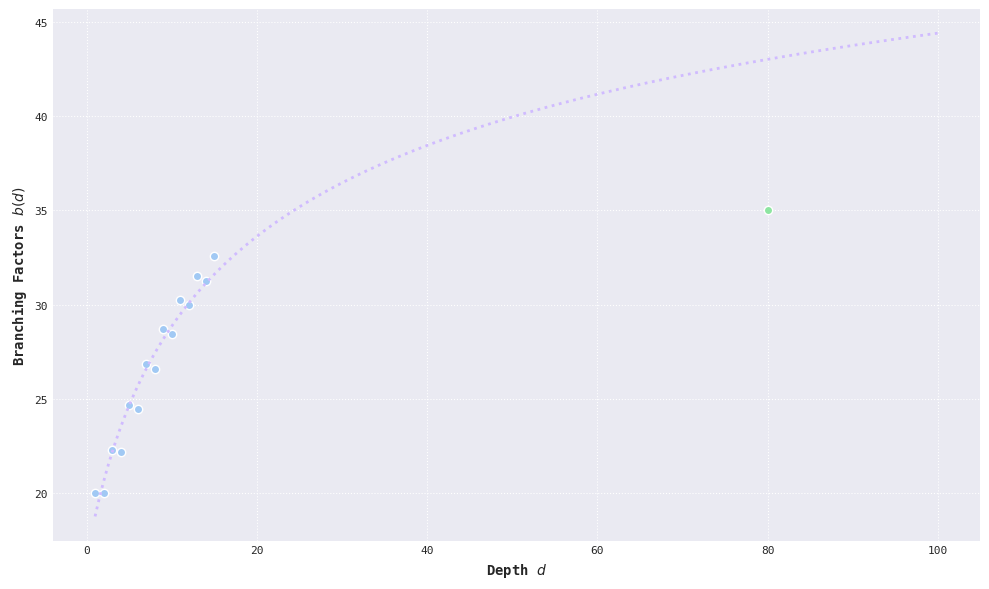

In [3]:
'''
Branching Factors (b(d) vs. d)
Visualizes the relationship between the depth (number of half-moves) in a game of chess
and the branching factor using a scatter plot and a custom curve fit line.

The script captures the diminishing returns of exploring deeper into the game tree due to 
the increasing number of possible moves, resulting in a logarithmic relationship between 
depth and branching factor.
'''

plt, ax, colors = load_plot()

# Prepare the data
depths    = np.array(list(range(1, 16)) + [80])
branching = np.array([20, 20, 22.255, 22.161, 24.663, 24.470, 26.843, 26.596, 28.701, 28.429, 30.246, 29.964, 31.518, 31.238, 32.562, 42.5], dtype = float)

# Define a custom logarithmic function
def custom_log(x, a, b, c, d):
    return a * np.log(x - c) ** b + d

# Fit the custom curve
depth_range = np.linspace(1, 100, 1000)
predictions = custom_log(depth_range, *curve_fit(custom_log, 
                                                 depths, 
                                                 branching,
                                                 maxfev = 100000,
                                                 p0 = (20, 1, 0, 0))[0])

# Create the scatter plot
plt.scatter(depths[:-1],    # Ignore the data pad at the end of the series
            branching[:-1], # Ignore the data pad at the end of the series
            color      = colors[0],
            marker     = 'o',
            edgecolors = 'white',
            label      = "Branching Factor")

# Isolate the point for the "Allis Estimate"
plt.scatter(np.array([80]),
            np.array([35]),
            color      = colors[2],
            marker     = 'o',
            edgecolors = 'white',
            label      = "Allis Estimate")

# Create the fit line
plt.plot(depth_range,
         predictions,
         color     = colors[4],
         linestyle = ':',
         linewidth = 2,
         label     = "Logarithmic Fit")

plt.xlabel("Depth $d$")
plt.ylabel("Branching Factors $b(d)$")
plt.tight_layout()

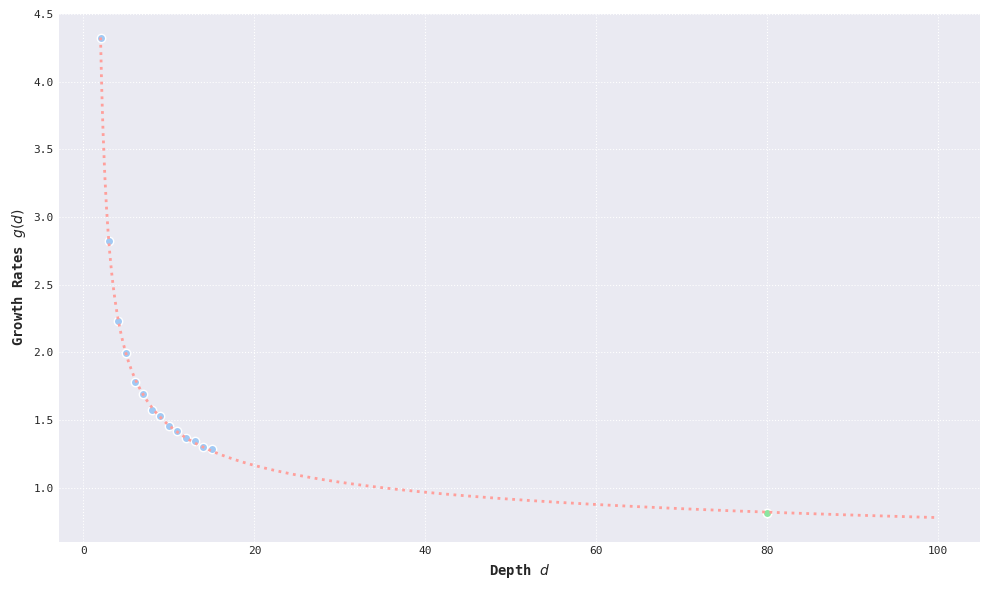

In [4]:
'''
Growth Rates (g(d) vs. d)
Visualizes the relationship between the depth (d) and the g(d) values using a scatter plot
and a logarithmic fit line.

This script demonstrates how to use curve fitting with a custom factorial function
to model the relationship between growth rates and depth (d) of moves in chess.
'''

plt, ax, colors = load_plot()

# Prepare the data
depths      = np.array(list(range(2, 16)) + [80])
g_values    = np.array([4.322, 2.824, 2.235, 1.992, 1.785, 1.691, 1.578, 1.528, 1.454, 1.422, 1.368, 1.345, 1.304, 1.286, 0.811])

# Define a custom logarithmic function
def custom_log(x, a, b, c, d):
    return a * (x ** b) / (x ** c + d)

# Fit the custom curve
depth_range = np.linspace(2, 100, 1000)
predictions = custom_log(depth_range, *curve_fit(custom_log, 
                                                 depths, 
                                                 g_values, 
                                                 maxfev = 100000, 
                                                 p0 = (1, -1, 1, 0))[0])

# Create the scatter plot
plt.scatter(depths,   
            g_values,   
            color      = colors[0], 
            marker     = 'o', 
            edgecolors = 'white', 
            label      = "Growth Rate")

# Isolate the point for the "Allis Estimate"
plt.scatter(np.array([80]),
            np.array([0.811]),
            color      = colors[2],
            marker     = 'o',
            edgecolors = 'white',
            label      = "Allis Estimate")

# Create the fit line
plt.plot(depth_range, 
         predictions, 
         color     = colors[3], 
         linestyle = ':', 
         linewidth = 2,       
         label     = "Logarithmic Fit")

plt.xlabel("Depth $d$")
plt.ylabel("Growth Rates $g(d)$")
plt.tight_layout()

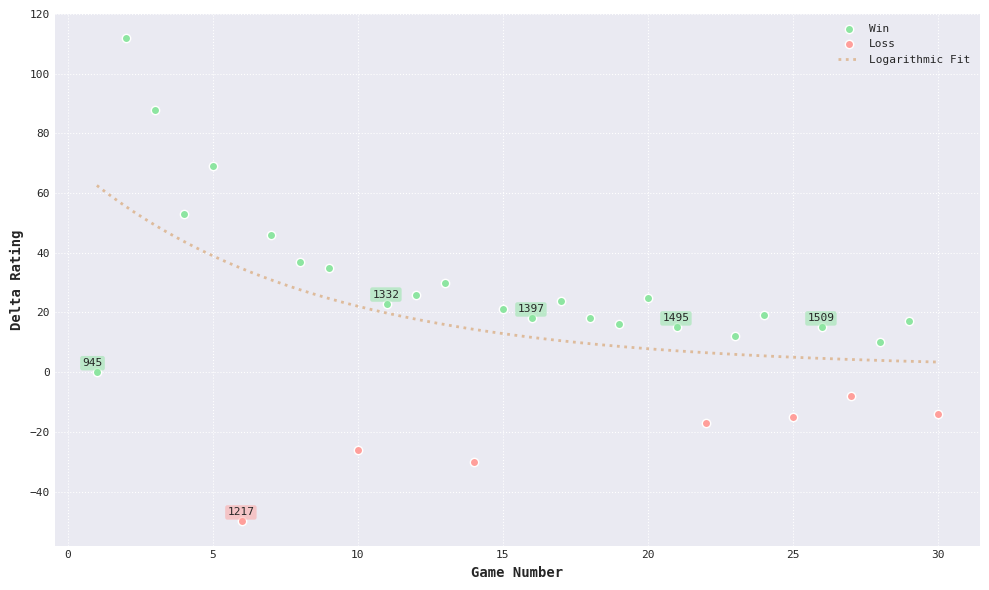

In [5]:
'''
Delta Rating vs. Game Number
Visualizes Player A's rating change, win/loss status, and opponent rating
in the first 30 games on a new chess account using a scatter plot.
'''

plt, ax, colors = load_plot()

# Prepare the data
game_numbers  = list(range(1, 31))
delta_ratings = [0, 112, 88, 53, 69, -50, 46, 37, 35, -26, 23, 26, 30, -30, 21, 18, 24, 18, 16, 25, 15, -17, 12, 19, -15, 15, -8, 10, 17, -14]
win_loss      = [2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3]
ratings       = [945, 1057, 1145, 1198, 1267, 1217, 1263, 1300, 1335, 1309, 1332, 1358, 1388, 1358, 1379, 1397, 1421, 1439, 1455, 1480, 1495, 1478, 1490, 1509, 1494, 1509, 1501, 1511, 1528, 1514]

def custom_log(x, a, b, c, d):
    return a * np.log(x - c) ** b + d

# Fit the custom curve
with np.errstate(invalid='ignore', divide='ignore'):
    game_range  = np.linspace(1, 30, 1000)
    predictions = custom_log(game_range, *curve_fit(custom_log, 
                                                    game_numbers, 
                                                    delta_ratings,
                                                    maxfev = 100000,
                                                    p0     = (20, 1, 0, 0))[0])

# Create the fit line
plt.plot(game_range,
         predictions,
         color     = colors[5],
         linestyle = ':',
         linewidth = 2)

for i, (gn, dr, wl, rt) in enumerate(zip(game_numbers, delta_ratings, win_loss, ratings)):
    plt.scatter(gn,
                dr,
                color      = colors[wl],
                marker     = 'o',
                edgecolors = 'white')
    
    if i % 5 == 0:
        plt.annotate(rt,
                     (gn, dr),
                     (gn - 0.5, dr + 2),
                     fontsize = 8,
                     bbox = dict(boxstyle  = "round,pad=0.2",
                                 edgecolor = "none",
                                 facecolor = colors[wl],
                                 alpha     = 0.5))

plt.xlabel("Game Number")
plt.ylabel("Delta Rating")

# Create the legend
win_marker  = plt.scatter([], [], color = colors[2], marker    = 'o', edgecolors = 'white', label = 'Win')
loss_marker = plt.scatter([], [], color = colors[3], marker    = 'o', edgecolors = 'white', label = 'Loss')
fit_line    = plt.plot([],    [], color = colors[5], linestyle = ':', linewidth  = 2,       label = 'Logarithmic Fit')[0]

plt.legend(handles = [win_marker, 
                      loss_marker, 
                      fit_line], 
                      loc = 'best')
plt.tight_layout()

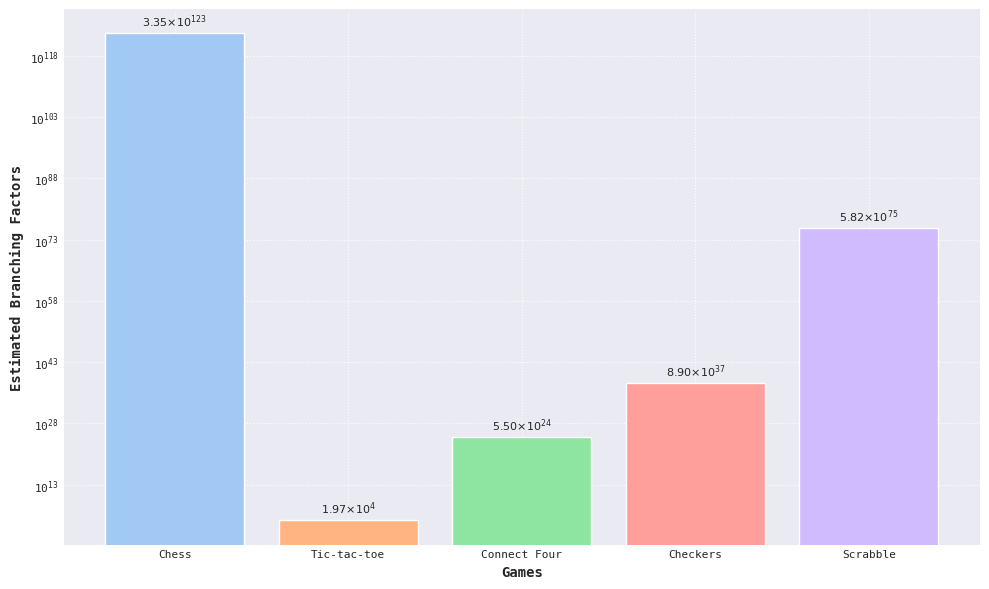

In [6]:
'''
Common Games: Estimated Branching Factors
Visualizes the estimated branching factors for various games using a bar chart.
'''

plt, ax, colors = load_plot()

# Prepare the data
games             = ["Chess", "Tic-tac-toe", "Connect Four", "Checkers", "Scrabble"]
branching_factors = [3.353e123, 19683, 5.5e24, 8.9e37, 5.82e75]

# Create the bar chart
bars = plt.bar(games, branching_factors, color = colors[:5], edgecolor = 'white')

# Add annotations to the top of each bar
for bar, bf in zip(bars, branching_factors):
    height   = bar.get_height()
    exponent = int(np.floor(np.log10(bf)))
    base     = bf / (10 ** exponent)
    ax.annotate(f'${base:.2f} × 10^{{{exponent}}}$',
                xy         = (bar.get_x() + bar.get_width() / 2, height),
                xytext     = (0, 3),
                textcoords = "offset points",
                ha         = 'center', 
                va         = 'bottom',
                fontsize   = 8)

plt.xlabel("Games")
plt.ylabel("Estimated Branching Factors")
plt.gca().set_yscale("log")
plt.tight_layout()

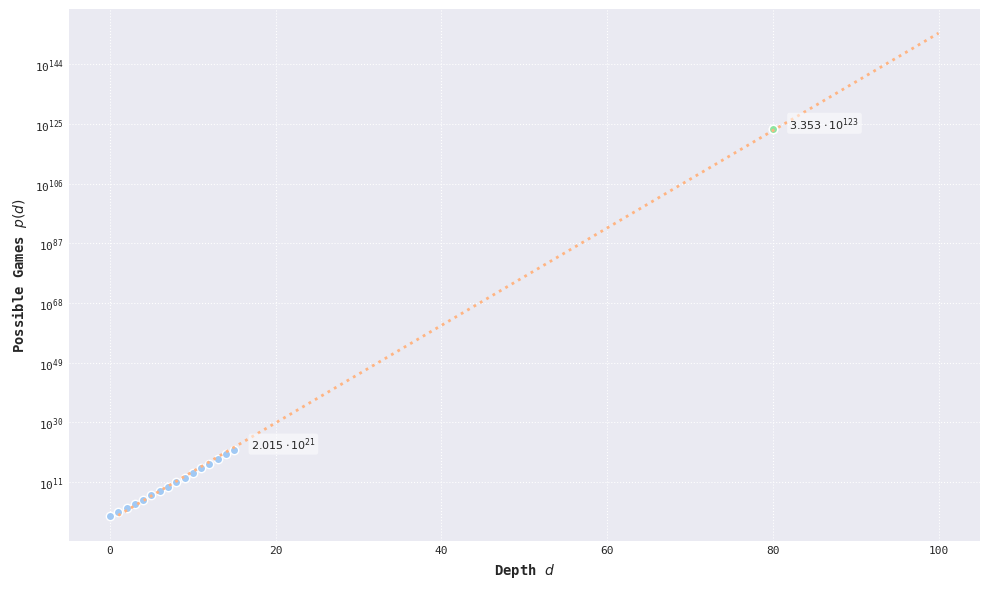

In [7]:
'''
Possible Games (p(d) vs. d)
Visualizes the relationship between the depth (number of half-moves) in a game of chess
and the number of possible unique games using a scatter plot and an exponential fit line.

This script demonstrates how to use linear regression with a logarithmic transformation
to model the exponential growth of possible games in chess as the depth increases.
'''

from sklearn.linear_model import LinearRegression as lr
plt, ax, colors = load_plot()

# Prepare the data
depths      = np.array(list(range(0, 16)) + [80])
positions   = np.array([1, 20, 400, 8902, 197281, 4865609, 119060324, 3195901860, 84998978956, 2439530234167, 69352859712417, 2097651003696806, 62854969236701747, 1981066775000396239, 61885021521585529237, 2015099950053364471960, 3.353e123], dtype = float)
annotations = [((15, 2.015e21), r'$2.015 \cdot 10^{21}$'), ((80, 3.353e123), r'$3.353 \cdot 10^{123}$')]

# Fit the linear regression model and generate predictions for the fit line
model       = lr().fit(depths[:, None], np.log(positions))
depth_range = np.linspace(1, 100, 1000)
predictions = np.exp(model.predict(depth_range[:, None]))

# Create the scatter plot
plt.scatter(depths,   
            positions,   
            color      = colors[0], 
            marker     = 'o', 
            edgecolors = 'white', 
            label      = "Perft Value")

# Isolate the point for the "Allis Estimate"
plt.scatter(np.array([80]),
            np.array([3.353e123]),
            color      = colors[2],
            marker     = 'o',
            edgecolors = 'white',
            label      = "Allis Estimate")

# Create the fit line
plt.plot(depth_range, 
         predictions, 
         color     = colors[1], 
         linestyle = ':', 
         linewidth = 2,       
         label     = "Exponential Fit")

# Add annotations as defined above to the plot
for pos, text in annotations:
    plt.annotate(text, pos, (pos[0] + 2, pos[1] * 1.5), fontsize = 8,
                 bbox = dict(boxstyle  = "round,pad = 0.2", 
                             edgecolor = "none", 
                             facecolor = "white", 
                             alpha     = 0.5))

plt.xlabel("Depth $d$")
plt.ylabel("Possible Games $p(d)$")
plt.gca().set(yscale = 'log')
plt.tight_layout()

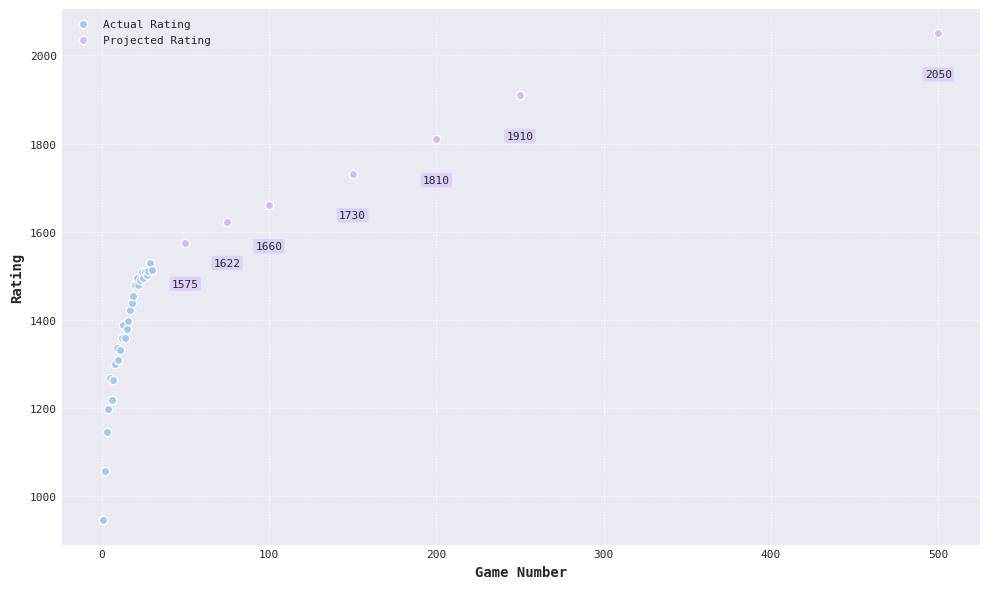

In [8]:
'''
Actual vs. Projected Rating
Visualizes Player A's actual rating change in the first 30 games on a new chess account,
and projects their rating after playing 50, 75, 100, 150, 200, 250, and 500 games using a scatter plot.
'''

plt, ax, colors = load_plot()

game_numbers  = list(range(1, 31))
win_loss      = [2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3]
ratings       = [945, 1057, 1145, 1198, 1267, 1217, 1263, 1300, 1335, 1309, 1332, 1358, 1388, 1358, 1379, 1397, 1421, 1439, 1455, 1480, 1495, 1478, 1490, 1509, 1494, 1509, 1501, 1511, 1528, 1514]

milestones          = [50, 75, 100, 150, 200, 250, 500]
milestone_ratings   = [1575, 1622, 1660, 1730, 1810, 1910, 2050]

# Plot ratings
plt.scatter(game_numbers, 
            ratings, 
            color      = colors[0], 
            marker     = 'o', 
            edgecolors = 'white', 
            label      = 'Actual Rating')

plt.scatter(milestones, 
            milestone_ratings, 
            color      = colors[4], 
            marker     = 'o', 
            edgecolors = 'white', 
            label      = 'Projected Rating')

# Add annotations for Projected Ratings
for idx, (ms, rt) in enumerate(zip(milestones, milestone_ratings)):
    plt.annotate("{:.0f}".format(rt),
                 (ms, rt),
                 xytext   = (ms, rt - 100),
                 ha       = "center",
                 fontsize = 8,
                 bbox     = dict(boxstyle  = "round,pad=0.2",
                                 edgecolor = "none",
                                 facecolor = colors[4],
                                 alpha     = 0.5))

plt.xlabel("Game Number")
plt.ylabel("Rating")
plt.legend(loc = 'best')
plt.tight_layout()